## Von Trennlinien zu Neuronalen Netzen

 
Wir werden in diesem Kapitel unseres Tutorials ein einfaches neuronales Netz entwickeln. Es wird ein Netzwerk sein, das zwei Klassen trennen kann, die durch eine gerade Linie im zweidimensionalen Raum abzugrenzen sind.

### Lineare Separierung


<img width="50%" class="imgright" src="../images/fence_as_a_dividing_line1.webp" srcset="../images/fence_as_a_dividing_line1_600w.webp 600w,../images/fence_as_a_dividing_line1_500w.webp 500w,../images/fence_as_a_dividing_line1_400w.webp 400w,../images/fence_as_a_dividing_line1_350w.webp 350w,../images/fence_as_a_dividing_line1_300w.webp 300w" alt="Fence as a dividing line" />

Bevor wir mit dem Programmieren des einfachen neuronalen Netzwerks beginnen, werden wir noch ein anderes Konzept entwickeln. Wir wollen nach Geraden suchen, die zwei Punkte oder die Punkte zweier Klassen in der Ebene trennen können. 

Wir werden dabei zunächst nur Geraden berücksichtigen, die durch den Ursprung des Koordinatensystems gehen. Den generellen Fall werden wir uns später im Tutorial ansehen.

Man könnte sich etwa vorstellen, dass man zwei Attribute hat, die die Eigenschaften eines essbaren Objektes, wie einer Frucht, beschreiben, zum Beispiel "Süsse" und "Säuerlichkeit".

Dies könnte man als Punkte im zweidimensionalen Raum ausdrücken. Die X-Achse wird für die Werte der Süsse genutzt und die Y-Achse entsprechend für die Werte der Säuerlichkeit. Stellen Sie sich vor, wir hätten zwei Früchte als Punkte in dieser Ebene dargestellt, eine Orange an der Position (3.5,1.8) und eine Zitrone bei (1.1,3.9).

Nun könnten wir Trennlinien definieren, die Punkte trennen, die mehr zitronenartig oder mehr orangenartig sind.

Im folgenden Diagramm haben wir eine Zitrone und eine Orange eingetragen. Die grüne Linie trennt die beiden Punkte. Wir nehmen an, dass alle anderen Zitronen oberhalb dieser Linie sind und alle Orangen darunter.


![Divion boundary](../images/orange_lemon_dividing_line.webp "Division Boundary simple")

Die grüne Gerade ist definiert als 
$$y = mx$$

Dabei ist   m die Steigung oder der Gradient der Gerade und
            x die unabhängige Variable 
            
der Funktion

$$m = \frac{p_2}{p_1}$$
<br>

Das bedeutet, dass ein Punkt $P'=(p'_1, p'_2)$ auf dieser Geraden liegt, wenn die folgende Bedingung erfüllt ist:

$$mp'_1 - p'_2 = 0$$

Das folgende Python Programm erzeugt eine Darstellung der gerade beschriebenen Situation:

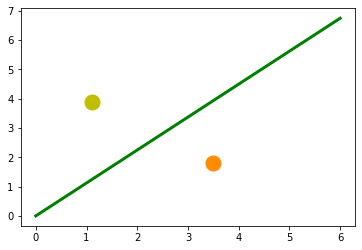

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig,ax = plt.subplots()

ax.plot(3.5, 1.8, "or", 
        color="darkorange", 
        markersize=15)


point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]  
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()




Es ist klar, dass ein Punkt $A =(a_1,a_2)$ nicht auf der Geraden liegt, wenn $m \cdot a_1 - a_2$ nicht gleich 0 ist. Wir wollen aber mehr wissen. Wir wollen wissen, ob ein beliebiger Punkt oberhalb oder unterhalb der Geraden liegt.
![Divion boundary](../images/above_or_below_line.webp "point below or above a straight line")

Wenn ein Punkt $m \cdot a_1 - a_2$ unterhalb der Geraden liegt, muss es ein $\delta_B > 0$ geben, so dass sich der Punkt $(b_1, b_2 + \delta_B)$ auf der Geraden befindet.

Das heisst, dass gilt:

$$m\cdot b_1  - (b_2 +  \delta_B) = 0$$

Welches umgestellt werden kann zu:

$$m\cdot b_1 - b_2 = {\delta_B}$$

So haben wir schliesslich ein Kriterium dafür, dass ein Punkt unterhalb der Geraden liegt.
$m \cdot b_1 - b_2$ ist positiv, weil ${\delta_B}$ positiv ist.

Die Überlegung für "der Punkt ist oberhalb der Geraden" ist analog: Wenn ein Punkt $A=(a_1, a_2)$ oberhalb der Geraden ist, muss es ein $\delta_A > 0$ geben, so dass der Punkt $(a_1, a_2 - \delta_A)$ auf der Geraden liegt.

Das heisst, dass gilt

$$m \cdot a_1 - (a_2 - \delta_A) = 0$$

was wiederum umgestellt werden kann zu

$$m \cdot a_1 - a_2 = -\delta_A$$

Zusammengefasst können wir sagen:
Ein Punkt $P(p_1, p_2)$ liegt


- unterhalb der Geraden, wenn $m \cdot p_1 - p_2 > 0$
- auf der Geraden, wenn $m \cdot p_1 - p_2 = 0$
- oberhalb der Geraden, wenn $m \cdot p_1 - p_2 < 0$


Wir können das nun bei unseren Früchten überprüfen. Die Zitrone hat die Koordinaten (1.1,3.9) und die Orange (3.5,1.8). Der Punkt auf der Geraden, den wir nehmen, um unsere Trennungslinie zu definieren, hat die Koordinaten (4,4.5). So ist also m 4.5/4.

In [2]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


Wir haben die grüne Linie nicht durch mathematische Methoden oder Formeln bestimmt, sondern willkürlich durch das Anschauen des Diagramms. Wir hätten genausogut andere Geraden nehmen können.

Das nachfolgende Python Programm berechnet und zeichnet einige Linien. Alle gehen durch den Ursprung, also durch (0,0). Die rot dargestellten sind absolut unbrauchbar, um die beiden Früchte zu trennen, weil in diesen Fällen die Zitrone und die Orange auf derselben Seite der Geraden liegen. 

Aber es ist sofort zu sehen, dass sogar die grünen Linien nicht besonders brauchbar sein könnten, wenn wir mehr als nur diese zwei Früchte hätten. Einige Zitronen könnten durchaus süsser sein und einige Orangen ganz schön sauer.

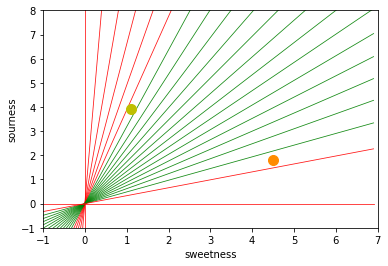

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ 
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line, 
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance
    
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
 
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)


plt.show()

Im Prinzip haben wir hier eine Klassifizierung durchgeführt durch unsere Trennlinien. Auch wenn kaum einer das so beschreiben würde.

Man kann sich leicht vorstellen, man hätte mehr Orangen und Zitronen mit etwas variierenden Süsse- und Sauerkeitswerten. Dies hiesse, wir hätten eine Zitronen-Klasse (```class2```) und einen Orangen-Klasse (```class1```), so wie im folgenden Diagramm dargestellt.

![Two clusters of 2-dimensional points](../images/line_separation0.webp "Two clusters of 2-dimensional points")

Lassen Sie uns jetzt einmal Zitronen und Orangen mit einem Python Programm "erzeugen". Wir werden diese beiden Klassen herstellen, indem wir zufällig Punkte erzeugen um einen definierten Mittelpunkt, innerhalb eines bestimmten Radius. 

Der folgende Python-Kode wir diese beiden Klassen generieren.

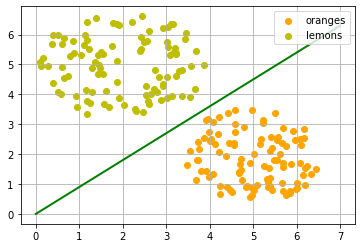

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()



Die Trennlinie wurde wieder willkürlich nach dem optischen Eindruck festgelegt. Es stellt sich die Frage: Wie machen wir das sytematisch? Weiter schauen wir nur auf Geraden durch den Ursprung, die allein durch ihre Steigung definiert sind. Das folgende Python Programm berechnet eine Trennlinie, indem es durch alle Früchte geht, und die Steigung der Trennlinie, die wir kalkulieren wollen, dynamisch anpasst. Wenn ein Punkt fälschlich oberhalb der Geraden liegt, werden wir die Steigung um den Wert von ```learning_rate``` erhöhen. Im umgekehrten Fall wird die Steigung um den Wert ```learning_rate``` vermindert.

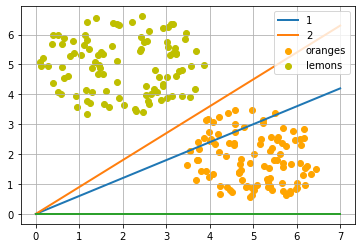

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle



X = np.arange(0, 8)
fig, ax = plt.subplots()

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

fruits = list(zip(oranges_x, 
                  oranges_y, 
                  repeat(0, len(oranges_x)))) 
fruits += list(zip(lemons_x, 
                   lemons_y, 
                   repeat(1, len(oranges_x))))
shuffle(fruits)

def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x - y
        #print(label, res)
        if label == 0 and res < 0:
            # point is above line but should be below 
            # => increment slope
            slope += learning_rate
            counter += 1
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 1 and res > 0:
            # point is below line but should be above 
            # => decrement slope
            #print(res, label)
            slope -= learning_rate
            counter += 1
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope

         
adjust()
slope = ax.plot(X,slope * X, linewidth=2)
ax.legend()
ax.grid()
plt.show()

print(slope)

Lassen Sie uns mit einer anderen Steigung von der Zitronen-Seite aus beginnen.

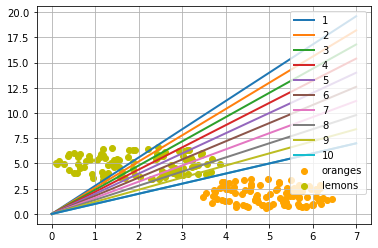

0.9999999999999996


In [6]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X, 
        slope * X,  
        linewidth=2)
ax.legend()
ax.grid()
plt.show()

print(slope)

### Ein einfaches Neuronales Netzwerk

Wir konnten die zwei Klassen mit einer geraden Linie trennen. Vielleicht fragen Sie sich, was das mit neuronalen Netzwerken zu tun hat. Damit beschäftigen wir uns im Folgenden.

Wir werden nun ein neuronales Netz definieren, um den vorher erzeugten Datensatz zu klassifizieren. Unser Netzwerk wird dabei nur aus einem einzigen Neuron bestehen, einem Neuron mit zwei Eingängen, einem für "Sauerkeit" und einem für "Süsse".


<img width="60%" src="../images/one_perceptron_neural_network.webp" srcset="../images/one_perceptron_neural_network_800w.webp 800w,../images/one_perceptron_neural_network_700w.webp 700w,../images/one_perceptron_neural_network_600w.webp 600w,../images/one_perceptron_neural_network_500w.webp 500w,../images/one_perceptron_neural_network_400w.webp 400w,../images/one_perceptron_neural_network_350w.webp 350w,../images/one_perceptron_neural_network_300w.webp 300w" alt="A Neural Network with just one perceptron" />

Die zwei Eingänge -in dem untenstehenden Programm als ```in_data``` bezeichnet - müssen mit Gewichten (engl. weights) ausgestattet werden.

Um unser Problem zu lösen, definieren wir eine Perceptron Klasse. Eine Instanz dieser Klasse ist dann ein Perceptron (oder Neuron). Es wird mit input_lenth initialisiert werden, also der Anzahl von Eingangswerten, und den Gewichten der Eingänge als Liste, Tupel oder Array. Wenn keine Werte für die Gewichte angegeben wurden, oder wenn dieser Parameter auf None gesetzt ist, nehmen wir den Wert 1/ input_length zum Initialisieren an.

Im folgenden Beispiel haben wir die Werte von -.45 und .5 als Werte für die Gewichte verwendet. Es ist natürlich nicht der normale Weg, dies so durchzuführen. Ein neuronales Netzwerk berechnet die Gewichte während der Trainigsphase selbst, wie wir später sehen werden.

In [7]:
import numpy as np

class Perceptron:
    
    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum
    
p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

-1.272456840912147, -0.8381311737922976, -1.7210328823456553, -1.7164443336547779, -1.152772453974578, -0.5965335961609546, -1.4414921195577752, -2.2677964033851756, -2.2715063635352166, -0.8626159625840708, 1.000848578905462, 1.5271738499021492, 1.7589329104912461, 1.8933321128522895, 1.1333056529123675, 2.301291908976644, 1.559044707422077, 2.3338729530700655, 1.6931211634235108, 1.651919811733254, 

Wir können sehen, dass wir einen negativen Wert bekommen, wenn wir eine Orange eingeben und einen positiven Wert für eine Zitrone. Damit können wir nun die Genauigkeit (engl. accuracy) unseres Netzwerkes für diesen Datensatz berechnen:

In [8]:
from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1


for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)

Counter({'corrects': 200})


Wie funktioniert nun dieser Vorgang? Wir summieren die Eingangswerte multipliziert mit den jeweiligen Gewichten und bekommen negative und positive Werte. Schauen wir uns an, was passiert, wenn die Summe der mit den Gewichten multiplizierten Eingangswerten 0 ergibt.

$$w_1 \cdot x_1 + w_2 \cdot x_2 = 0$$

Wir können dies umformulieren zu:

$$ x_2 = -\frac{w_1}{w_2} \cdot x_1$$

Wir können das nun mit einer generellen Geradengleichung vergleichen 

$$ y = m \cdot x + c$$

wo

-  m die Steigung der Geraden ist.
-  c ist der Schnittpunkt der Geraden mit der Y-Achse.
-  x ist die unabhängige Varable der Funktion.


Wir können leicht sehen, dass unsere Gleichung von oben der Definition einer Geraden entspricht und die Steigung (oder der Gradient) $m$  $-\frac{w_1}{w_2}$ ist und $c$ = 0.

Diese gerade Linie, die die Orangen und Zitronen trennt, heisst **Entscheidungsgrenze** (engl. **decision boundary**). 

Wir zeigen das jetzt mit einem Python Programm:

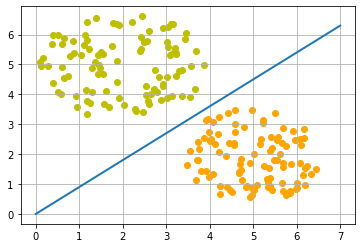

0.9


In [9]:
import time
import matplotlib.pyplot as plt
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X,  linewidth=2)


ax.grid()
plt.show()

print(slope)

### Das Trainieren eines neuronalen Netzwerkes

Wie wir schon im vorhergehenden Abschnitt ausgeführt haben: Wir haben unser Netzwerk nicht trainiert. Wir haben die Gewichte auf Werte gesetzt, von denen wir wussten, dass sie eine Trennlinie erzeugen würden. Jetzt werden wir zeigen, wie man stattdessen unser einfaches neuronales Netz trainieren kann.

Bevor wir damit anfangen, werden wir unseren Datensatz in Trainings- und Testdaten aufteilen im folgenden Pythopn Programm. Indem wir random_state auf den Wert 42 setzen, erzeugen wir für jeden Durchlauf denselben Output, wir starten also den (Pseudo-)Zufallszahlengenerator jeweils in identischer Weise, was sehr beim Debugging helfen kann.


In [10]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])



[(1.0297098955916502, 5.322946484305006), (3.980172300999787, 1.2458768746900604), (6.447861958748447, 1.5016695681267946), (3.2997532622608703, 4.791013780451421), (2.9337811418478723, 4.357777499905), (3.2193576874541527, 5.382559670669664), (0.8885497678779746, 5.36819788063829), (4.235579255978722, 0.6643812429655724), (1.3937073235833213, 6.552870063965783), (0.2741721816100482, 4.963058323199912)] [1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


Da wir mit zwei willkürlichen Gewichten starten, können wir natürlich kein korrektes Resultat erwarten. Für einige Punkte (Früchte) kann das richtige Ergebnis zurückgegeben werden, also zum Beispiel 1 für eine Orange und 0 für einen Zitrone. Wenn das Ergebnis falsch ist, müssen wir unsere Gewichte korrigieren. Zunächst müssen wir dazu den Fehler des Netzwerks berechnen. Dieser Fehler ist die Differenz zwischen dem Ziel- oder Erwartungswert (```target_result```) und dem berechneten Wert (```calculated_result```). Mit diesem Fehler müssen wir dann unsere Gewichte mit einem hinzuzufügenden Wert berichtigen, z.B. $w_1 = w_1 + \Delta w_1$ and $w_2 = w_2 + \Delta w_2$.
<img width="80%" src="../images/neuron_input_weights_error_correction.webp" srcset="../images/neuron_input_weights_error_correction_800w.webp 800w,../images/neuron_input_weights_error_correction_700w.webp 700w,../images/neuron_input_weights_error_correction_600w.webp 600w,../images/neuron_input_weights_error_correction_500w.webp 500w,../images/neuron_input_weights_error_correction_400w.webp 400w,../images/neuron_input_weights_error_correction_350w.webp 350w,../images/neuron_input_weights_error_correction_300w.webp 300w" alt="Adjusting the weights in a neural network" />

Ist der Fehler ```e``` 0 , müssen wir nichts tun, der Zielwert ist gleich dem berehneten Wert. Für diese Eingangswerte ist das Netzwerk perfekt. Ist der Fehler nicht 0, müssen wir die Gewichte ändern. Wir addieren kleine Werte dazu. Diese können positiv oder negativ sein. Das Ausmass der notwendigen Änderung der Gewichte hängt
vom Fehler und von den Eingangswerten ab. Lassen Sie uns annehmen, $x_1 = 0$ and $x_2 > 0$. In diesem Fall hängt das Ergebnis nur vom Eingangswert $x_2$ ab. Das bedeutet aber, dass wir nur  $w_2$ ändern müssen , um den Fehler zu mimimieren. Ist der Fehler negativ, müssen wir einen kleinen negativen Wert dazu addieren, im gegensätzlichen Fall umgekehrt. Hieraus können wir ersehen, dass was immer auch die Eingangswerte sind, wir können sie mit dem Fehler multiplizieren und erhalten Werte, die wir zu den Gewichten hinzufügen können. Aber eine Sache fehlt noch, das Netzwerk würde in viel zu grossen Schritten lernen und könnte dann überkorrigieren.
Wir haben ja vielen Datensätze und jedes Beispiel sollte die Gewichte nur ein wenig ändern, damit insgesamt das Netzwerk sich in die richtige Richtung verändert und nicht über das Ziel hinausschiesst, wenn ein einzelnes Eingabebeispiel zu einem grossen Fehler führt. Wir multiplizieren den Fehler deshalb mit einem kleinen Wert, der Lernrate (```self.learning_rate```). Diese Lernrate bestimmt, wie schnell sich die Gewichte adaptieren. Kleine Werte machen den Lernprozess langsamer, grosse Werte können zu suboptimalen Gewichten und Übersteuern des Netzwerkes führen. Wir werden in unserem Kapitel über Fehlerrückführung (engl. backpropagation) genauer darauf zurückkommen.

Wir sind nun soweit, dass wir den Kode schreiben können, um die Gewichte anzupassen, also unser Netzwerk zu trainieren. Dazu dient die Methode "adjust" in unserer Perceptron Klasse. Diese Methode soll den Fehler des Netzwerkes korrigieren.



In [11]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 153), ('wrong', 7)]
[('correct', 39), ('wrong', 1)]
[-2.63998496  3.89625398]


Sowohl bei den Trainigsdaten als auch bei den Testdaten haben wir nur richtige Werte, das heisst unser Netzwerk konnte automatisch lernen und das erfolgreich!

Wir visualisieren die Entscheidungsgrenze mit dem untenstehenden Programm:

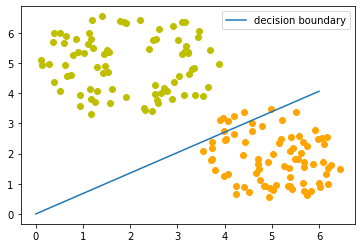

[-2.63998496  3.89625398]


In [12]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

Schauen wir uns diesen Algorithmus "in Bewegung" an.

1 -3.996345163151891 [-1.09405169 -0.27376306] (3.980172300999787, 1.2458768746900604)
3 0.08949036192336475 [-0.10412571  1.16354107] (3.2997532622608703, 4.791013780451421)
7 1.4258052489845257 [-1.37479949  0.9642267 ] (4.235579255978722, 0.6643812429655724)
57 0.28801544739924656 [-0.59547429  2.06750817] (2.597750661269183, 3.677604897509984)
58 1.5750006792143627 [-2.14345721  1.36092462] (5.159943059774736, 2.355278478596977)
63 0.4265487045291063 [-1.17291021  2.74976855] (3.235156648704575, 4.629479756299315)
64 1.6224723870496303 [-2.82440747  1.74080465] (5.504990850609077, 3.3632130197429086)
67 0.7033182004643341 [-2.06591633  2.937385  ] (2.528303786056007, 3.9886011838702835)


IndexError: index 7 is out of bounds for axis 0 with size 7

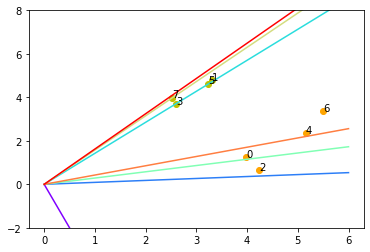

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"        
        ax.scatter(train_data[index][0], 
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter), 
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()


Jeder der Punkte im obigen Diagramm verursacht eine Änderung der Gewichte. Wir sehen sie in der Reihenfolge ihres Erscheinens durchnummeriert und ebenfalls die jeweilige gerade Linie. So können wir sehen, wie das Netzwerk "lernt", sich also adaptiert.